In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [37]:
def get_masked_image(path):
    gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = 5)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = 5)
    sobel = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

    _, thresh = cv2.threshold(sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.dilate(thresh, np.ones((3, 3), np.uint8))
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cnt = max(contours, key = cv2.contourArea)

    image = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
    mask = np.zeros(image.shape, dtype=np.uint8)
    cv2.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
    
    return cv2.bitwise_and(image, mask)

In [27]:
i = 0
path = "./data_orange_peels"
for subdir in os.listdir(path):
    for file in os.listdir(os.path.join(path, subdir)):
        print(file)
        i += 1
        if i == 3:
            break
    if i == 3:
        break

IMG_6312.JPG
IMG_6313.JPG
IMG_6314.JPG


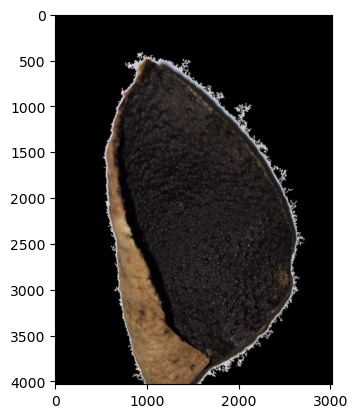

In [41]:
plt.imshow(get_masked_image(os.path.join(path, "10", "IMG_6348.JPG")))

In [59]:
masked = get_masked_image(os.path.join(path, "10", "IMG_6348.JPG"))

In [60]:
masked

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [61]:
red = masked[:, :, 0]
green = masked[:, :, 1]
blue = masked[:, :, 2]

In [ ]:
for r, g, b in zip(red, green, blue):
    print(r, g, b)

In [48]:
masked.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)